In [12]:
import pandas as pd

df = pd.read_csv("/Users/anikarzzk/Downloads/combined_df (2).csv")
df.head()



,Unnamed: 0,intake_method,referer,age,appointment_location,appointment_time,Medication_Management,Talk_Therapy
0,0,Call,Bariatric Doctor,20-30,Virtual,Evening,0,1
1,1,Call,Family/Friend,10-20,Virtual,Afternoon,0,1
2,2,Boom Form,Family/Friend,20-30,Freehold,Afternoon,0,1
3,3,Boom Form,Family/Friend,20-30,Freehold,Afternoon,0,1
4,4,Boom Form,Family/Friend,30-40,Freehold,Afternoon,0,1


In [14]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             1780 non-null   int64 
 1   intake_method          1779 non-null   object
 2   referer                1780 non-null   object
 3   age                    1780 non-null   object
 4   appointment_location   1780 non-null   object
 5   appointment_time       1780 non-null   object
 6   Medication_Management  1780 non-null   int64 
 7   Talk_Therapy           1780 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 111.4+ KB
None
         Unnamed: 0 intake_method        referer    age appointment_location  \
count   1780.000000          1779           1780   1780                 1780   
unique          NaN             8             40     11                    4   
top             NaN          Call  Family/Friend  30-40              Virtual   
freq   

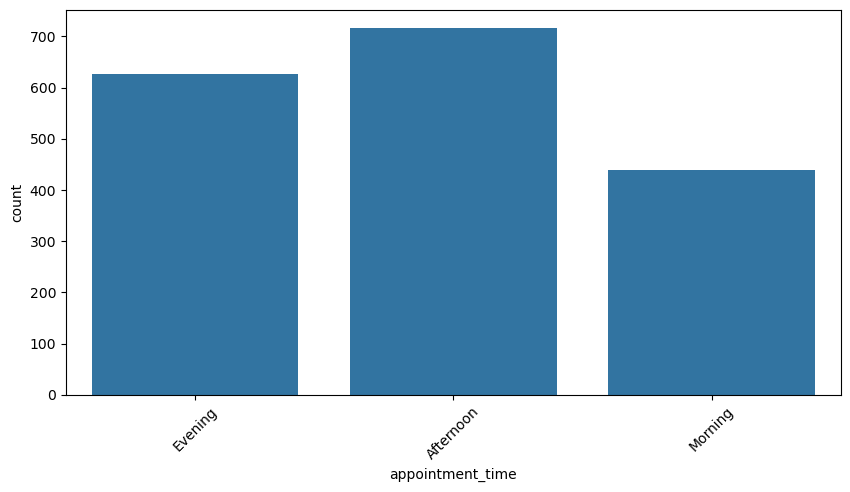

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="appointment_time")
plt.xticks(rotation=45)
plt.show()

In [32]:
df = df.drop(columns=["Unnamed: 0"], errors="ignore")



In [34]:
df["is_morning"] = df["appointment_time"].apply(lambda x: 1 if x == "Morning" else 0)
df.head()

,intake_method,referer,age,appointment_location,appointment_time,Medication_Management,Talk_Therapy,is_morning
0,Call,Bariatric Doctor,20-30,Virtual,Evening,0,1,0
1,Call,Family/Friend,10-20,Virtual,Afternoon,0,1,0
2,Boom Form,Family/Friend,20-30,Freehold,Afternoon,0,1,0
3,Boom Form,Family/Friend,20-30,Freehold,Afternoon,0,1,0
4,Boom Form,Family/Friend,30-40,Freehold,Afternoon,0,1,0


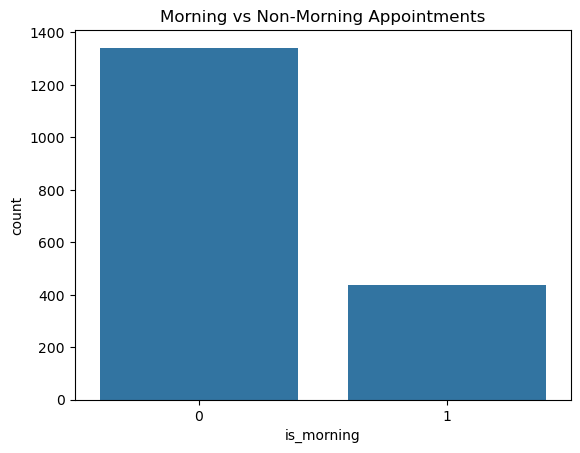

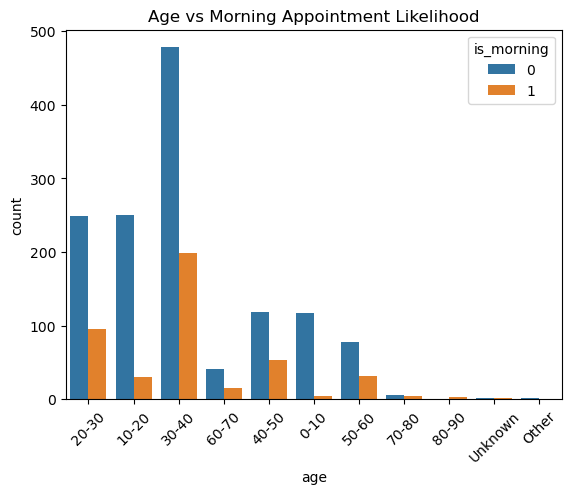

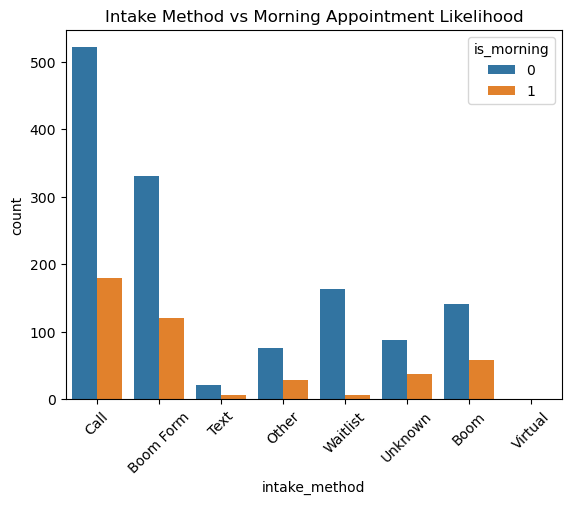

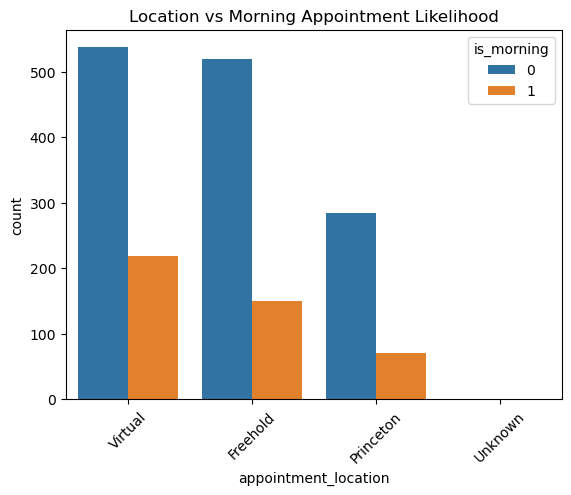

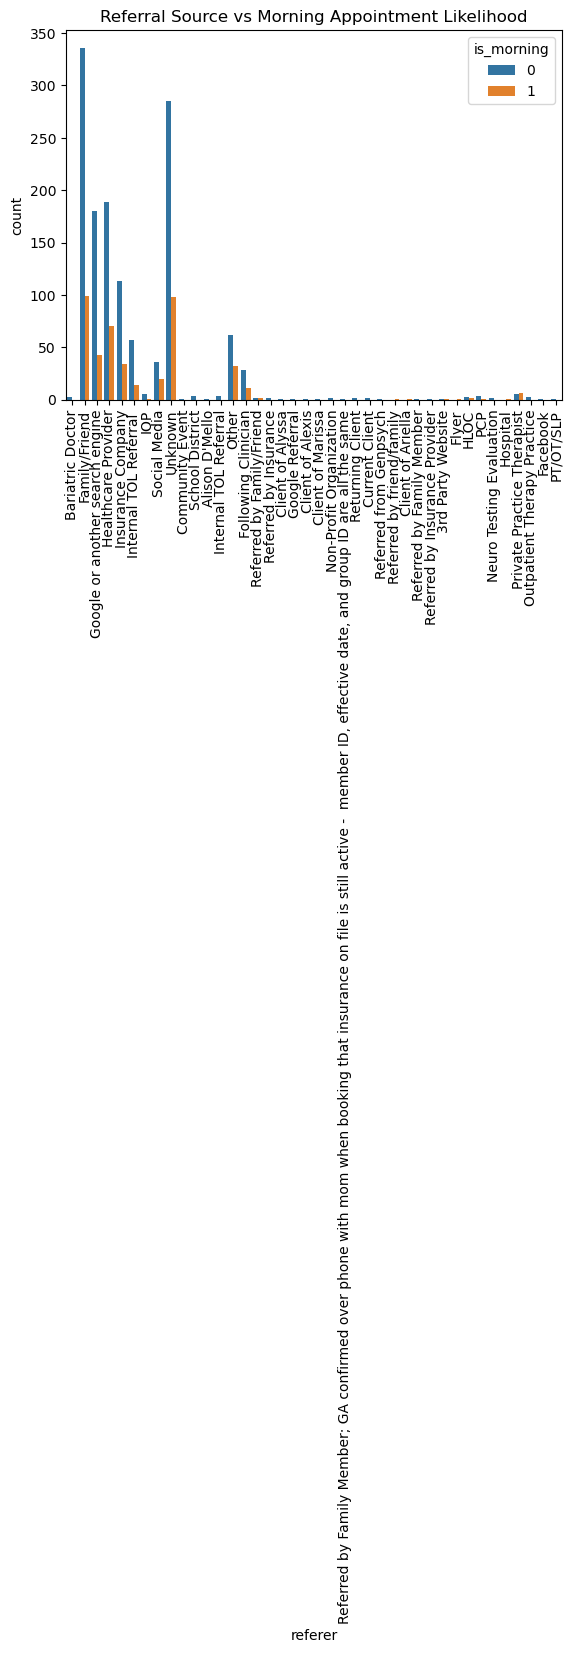

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(data=df, x="age", hue="is_morning")
plt.xticks(rotation=45)
plt.title("Age vs Morning Appointment Likelihood")
plt.show()

sns.countplot(data=df, x="intake_method", hue="is_morning")
plt.xticks(rotation=45)
plt.title("Intake Method vs Morning Appointment Likelihood")
plt.show()

sns.countplot(data=df, x="appointment_location", hue="is_morning")
plt.xticks(rotation=45)
plt.title("Location vs Morning Appointment Likelihood")
plt.show()

sns.countplot(data=df, x="referer", hue="is_morning")
plt.xticks(rotation=90)
plt.title("Referral Source vs Morning Appointment Likelihood")
plt.show()


In [38]:
df.head()

,intake_method,referer,age,appointment_location,appointment_time,Medication_Management,Talk_Therapy,is_morning
0,Call,Bariatric Doctor,20-30,Virtual,Evening,0,1,0
1,Call,Family/Friend,10-20,Virtual,Afternoon,0,1,0
2,Boom Form,Family/Friend,20-30,Freehold,Afternoon,0,1,0
3,Boom Form,Family/Friend,20-30,Freehold,Afternoon,0,1,0
4,Boom Form,Family/Friend,30-40,Freehold,Afternoon,0,1,0


In [40]:
df = df.drop(columns=["is_morning"], errors="ignore")
df.head()

,intake_method,referer,age,appointment_location,appointment_time,Medication_Management,Talk_Therapy
0,Call,Bariatric Doctor,20-30,Virtual,Evening,0,1
1,Call,Family/Friend,10-20,Virtual,Afternoon,0,1
2,Boom Form,Family/Friend,20-30,Freehold,Afternoon,0,1
3,Boom Form,Family/Friend,20-30,Freehold,Afternoon,0,1
4,Boom Form,Family/Friend,30-40,Freehold,Afternoon,0,1


In [42]:
X = df[["intake_method", "referer", "age", "appointment_location"]]
y = df["appointment_time"]


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)


In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ["intake_method", "referer", "age", "appointment_location"]

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=123
)

from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', rf_model)
])


In [54]:
rf_pipeline.fit(X_train, y_train)
from sklearn.metrics import classification_report

y_pred = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   Afternoon       0.43      0.55      0.48       128
     Evening       0.54      0.63      0.58       126
     Morning       0.45      0.21      0.28       102

    accuracy                           0.48       356
   macro avg       0.47      0.46      0.45       356
weighted avg       0.47      0.48      0.46       356



In [58]:
import numpy as np

# get feature names
ohe = rf_pipeline.named_steps["preprocess"].named_transformers_["cat"]
feature_names = ohe.get_feature_names_out(categorical_cols)

# get importances
importances = rf_pipeline.named_steps["model"].feature_importances_

# sort descending
indices = np.argsort(importances)[::-1]

# print top 20
for i in indices[:20]:
    print(feature_names[i], ":", importances[i])


intake_method_Waitlist : 0.059204531899721025
intake_method_Call : 0.052205903628386376
referer_Unknown : 0.051721530238316604
appointment_location_Freehold : 0.04871134712553123
referer_Family/Friend : 0.0471957590292339
appointment_location_Virtual : 0.04547457472337539
age_10-20 : 0.044414208519384116
appointment_location_Princeton : 0.04350226832344966
referer_Healthcare Provider : 0.043486045224655
age_30-40 : 0.04347079317156849
intake_method_Boom Form : 0.043150942747395005
age_20-30 : 0.04198819003783779
age_0-10 : 0.03702392318069219
referer_Google or another search engine : 0.03631111984176585
referer_Insurance Company : 0.034486026809662826
intake_method_Boom : 0.032902886495767336
age_40-50 : 0.03259264731872909
age_50-60 : 0.030092543012819013
intake_method_Other : 0.029986145408612417
referer_Other : 0.0241996227567146


In [64]:
print("The model achieved 48% accuracy (above random chance (33%)), confirming moderate but kinda meaningful patterns. Morning appointments had the lowest recall (0.21) which aligns with the business challenge that morning slots are the most difficult to fill and the least predictable. Feature importance analysis identified the top demographic factors influencing the features. Above also has the data on who's booking Morning.")


The model achieved 48% accuracy (above random chance (33%)), confirming moderate but kinda meaningful patterns. Morning appointments had the lowest recall (0.21) which aligns with the business challenge that morning slots are the most difficult to fill and the least predictable. Feature importance analysis identified the top demographic factors influencing the features. Above also has the data on who's booking Morning.


In [66]:
#finetuning

rf_model = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=123
)


In [70]:
rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', rf_model)
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Afternoon       0.45      0.44      0.44       128
     Evening       0.55      0.62      0.58       126
     Morning       0.40      0.34      0.37       102

    accuracy                           0.47       356
   macro avg       0.46      0.47      0.46       356
weighted avg       0.47      0.47      0.47       356



In [72]:
print("even paying more attention to morning by using class balancing, the recall is still pretty low which makes sense because theres a not of ambiguity and less occurence with morning appointtments. this affirms what was said above")

even paying more attention to morning by using class balancing, the recall is still pretty low which makes sense because theres a not of ambiguity and less occurence with morning appointtments. this affirms what was said above
